In [1]:
import requests
import base64
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.stats as st
import numpy as np

In [2]:
# Load the full CSV file created in prior step
music_df = pd.read_csv("Merged_Music_File_with_Spotify.csv")
music_df.drop(columns="Unnamed: 0", inplace=True)
music_df.drop(columns="Genre", inplace=True)
music_df["Date"] = pd.to_datetime(music_df["Date"])
clean_music = pd.DataFrame(music_df.loc[music_df["Year"] >2017,:])

# Display sample data
clean_music.head()

,Position,Track Name,Artist,Streams,Date,Year,Month,Master Genre,Track ID,Popularity,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
72182,1,rockstar,Post Malone,3962314,2018-01-01,2018,1,Rap,0e7ipj03S05BNilyu5bRzt,84,...,0.520,0.000070,5,0.1310,-6.136,0,0.0712,159.801,4,0.129
72183,2,Havana (feat. Young Thug),Camila Cabello,3314677,2018-01-01,2018,1,Pop,1rfofaqEpACxVEHIZBJe6W,80,...,0.523,0.000036,2,0.1320,-4.333,1,0.0300,104.988,4,0.394
72184,3,New Rules,Dua Lipa,2940488,2018-01-01,2018,1,Pop,2ekn2ttSfGqwhhate0LSR0,81,...,0.700,0.000016,9,0.1530,-6.021,0,0.0694,116.073,4,0.608
72185,4,Wolves,Selena Gomez,2509878,2018-01-01,2018,1,Pop,0tBbt8CrmxbjRP0pueQkyU,79,...,0.804,0.000000,11,0.2040,-4.614,0,0.0448,124.987,4,0.306
72186,5,Shape of You,Ed Sheeran,2439876,2018-01-01,2018,1,Pop,7qiZfU4dY1lWllzX7mPBI3,87,...,0.652,0.000000,1,0.0931,-3.183,0,0.0802,95.977,4,0.931


In [3]:
# Utilzing 3/18/2020 date as the marker between pre/post Covid
# Since we have data until 7/17/21 I'm narrowing down data to 486 days before and after 
filtered_music = clean_music.loc[(clean_music["Date"] > "2018-11-16")]


In [4]:
dailytop_song = pd.DataFrame(filtered_music.loc[filtered_music["Position"]==1,:])
top10_songs = pd.DataFrame(filtered_music.loc[filtered_music["Position"]<11,:])

In [5]:
#Pre-Covid 11/17/2018 - 3/17/2020
#Post-Covid 3/20/2020 - 7/17/2021

# Popularity
# acousticness
# danceability
# duration_ms
# energy
# instrumentalness
# key
# liveness
# loudness 
# mode
# speechiness 
# tempo
# time_signature
# valence

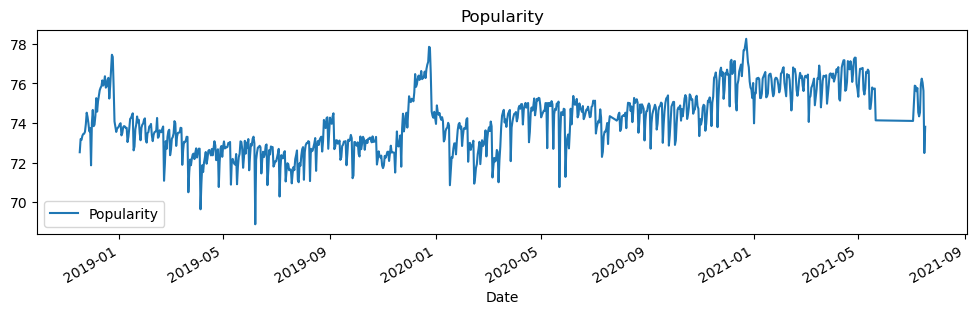

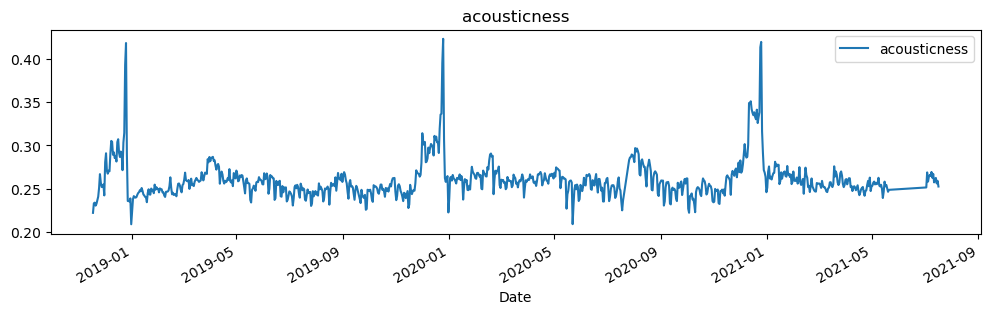

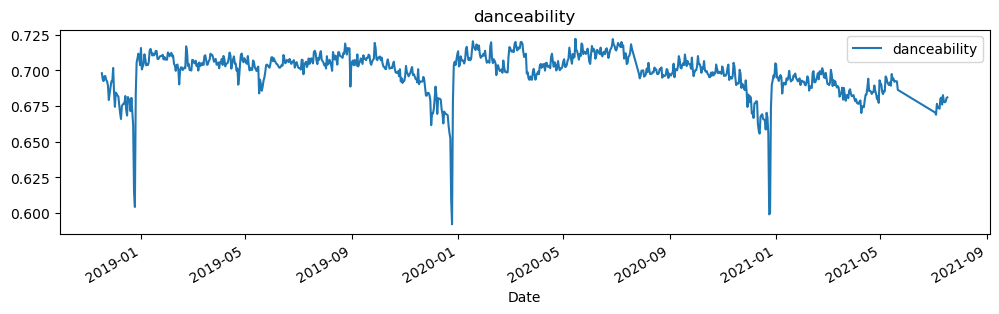

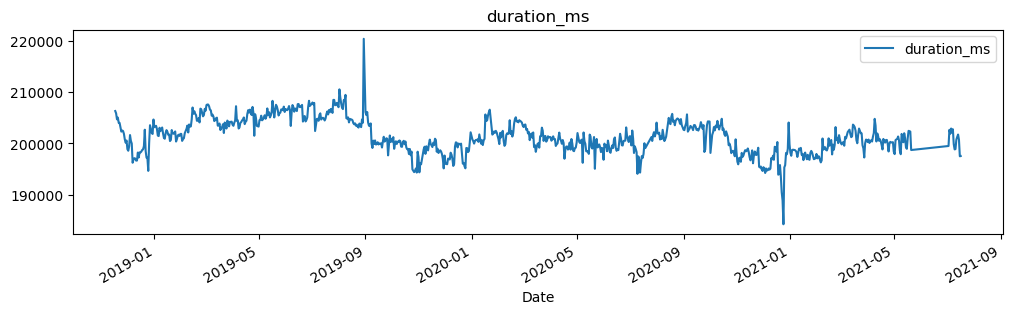

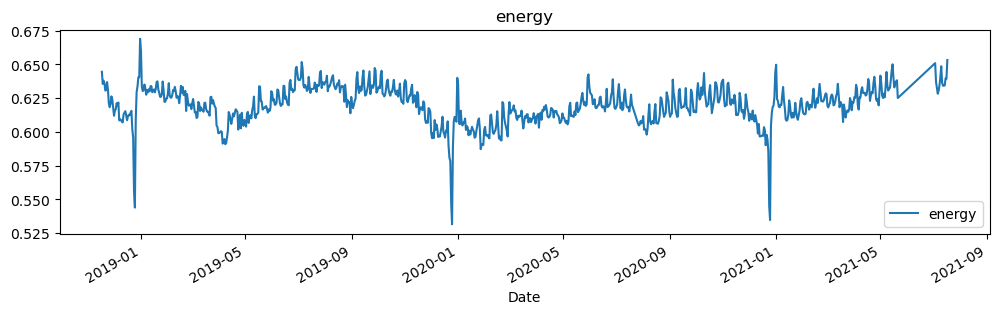

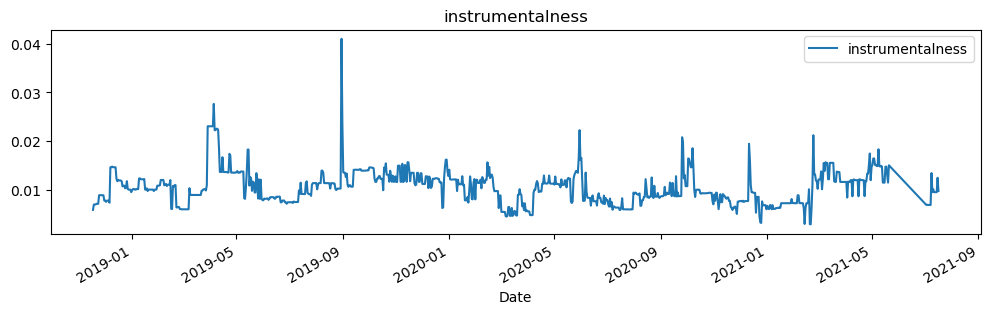

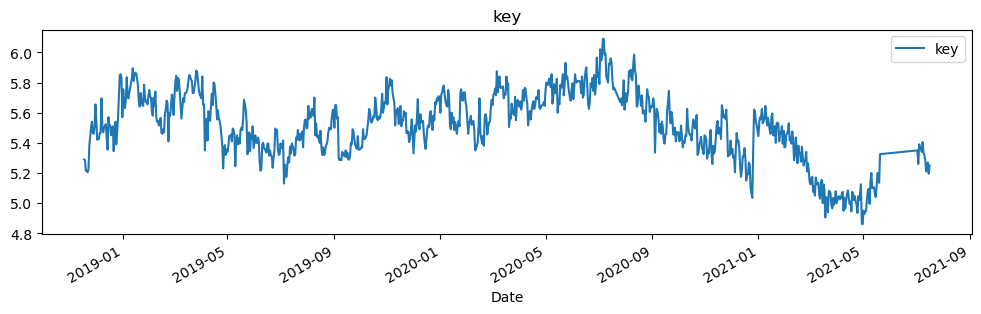

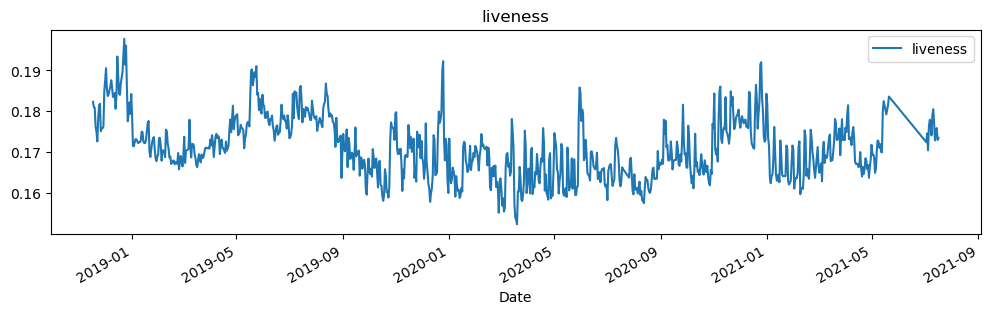

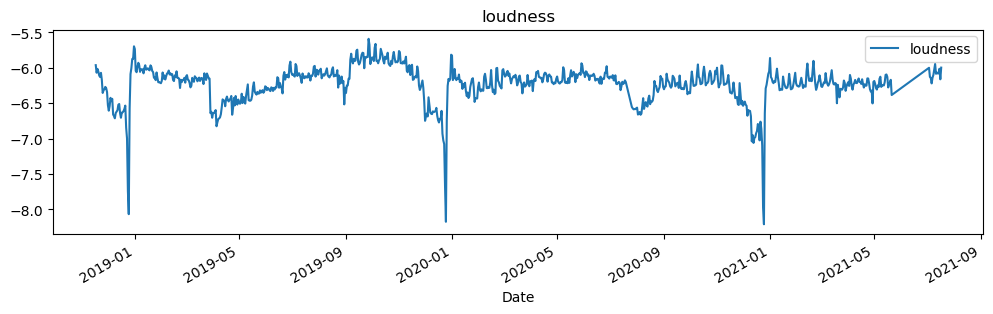

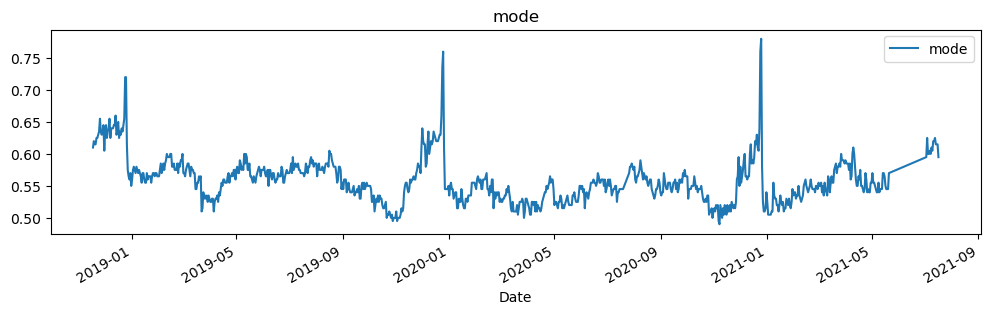

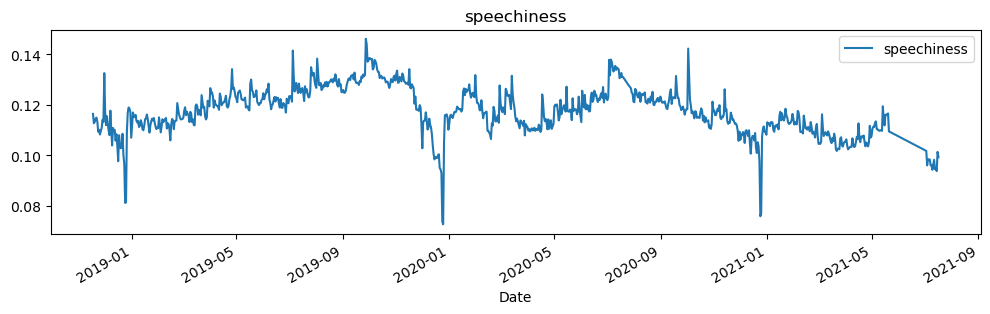

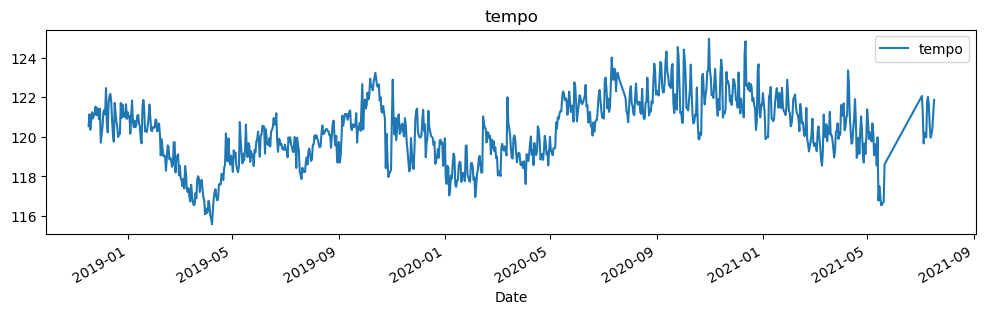

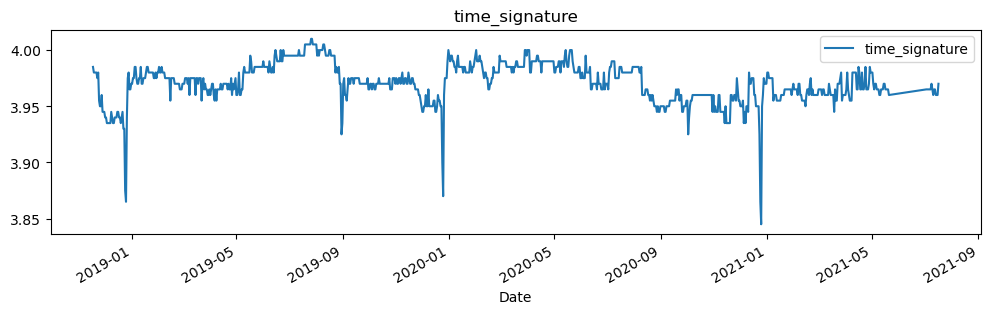

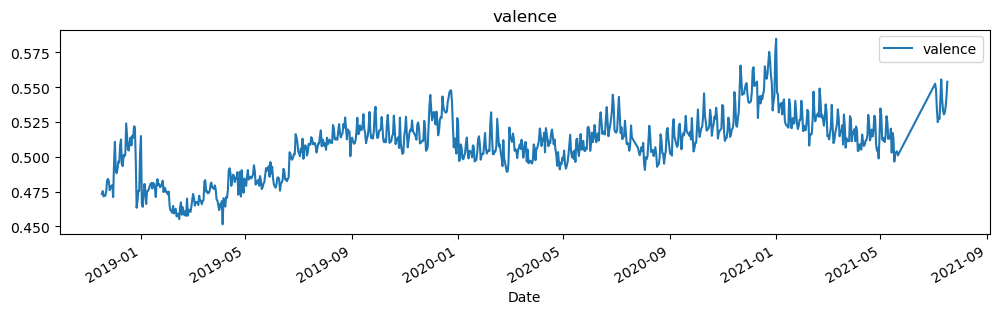

In [30]:
# Defining list of audio features
features = ["Popularity", "acousticness", "danceability", "duration_ms", 
            "energy", "instrumentalness", "key", "liveness", "loudness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

# Plotting all the audio features on a different line chart by using a for loop
for measure in features:
    chart_changes = filtered_music.groupby(["Date"]).mean(measure).reset_index()
    chart_changes.plot(kind = "line", x="Date", y=measure, figsize=(12,3))
    plt.title(measure)


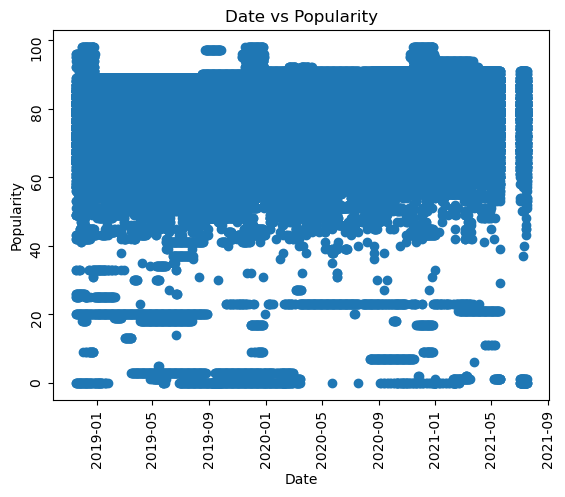

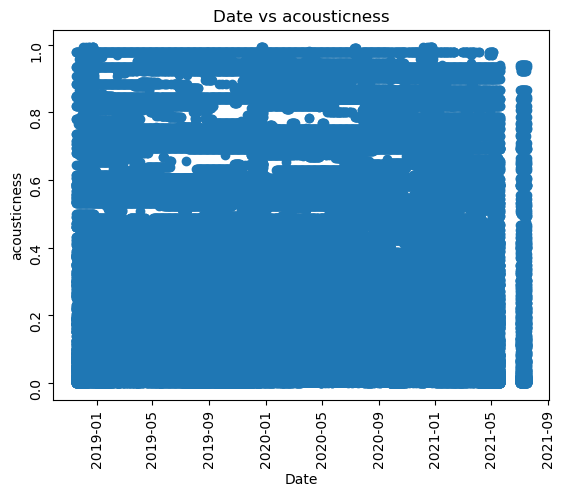

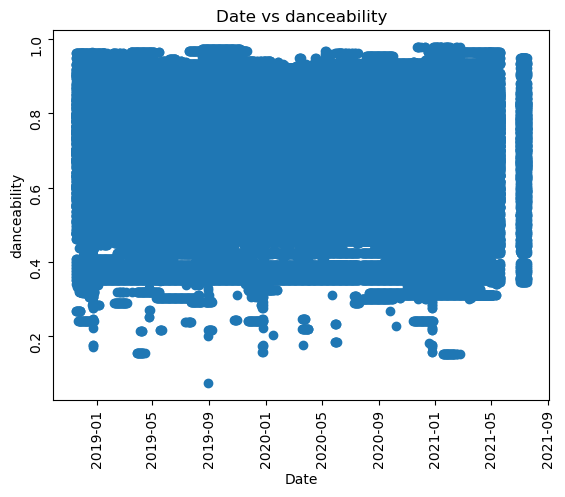

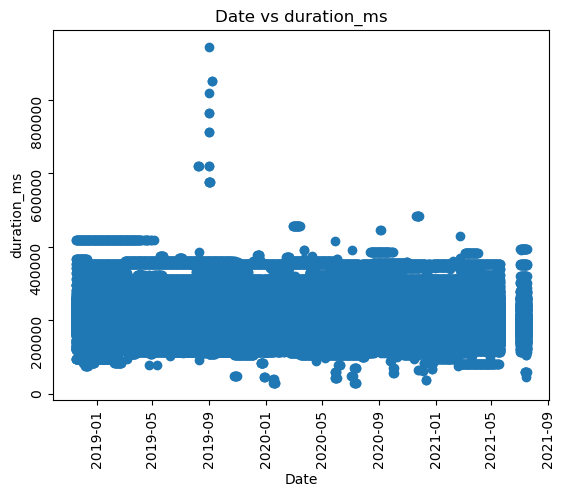

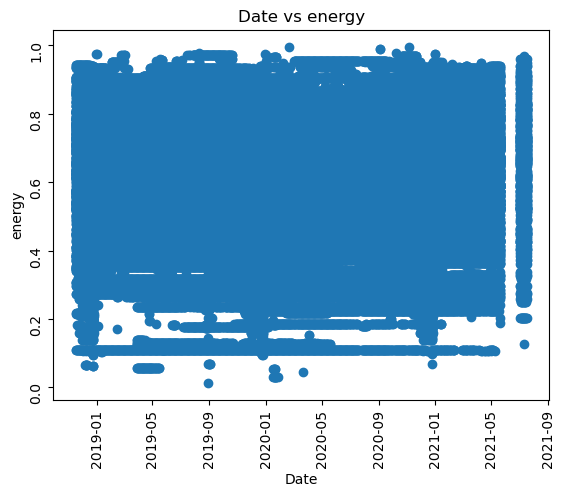

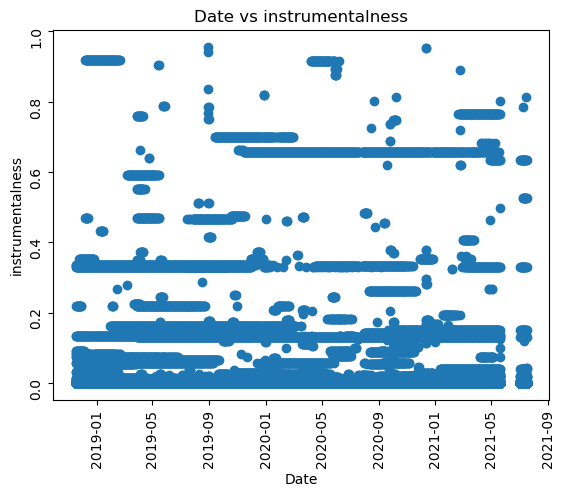

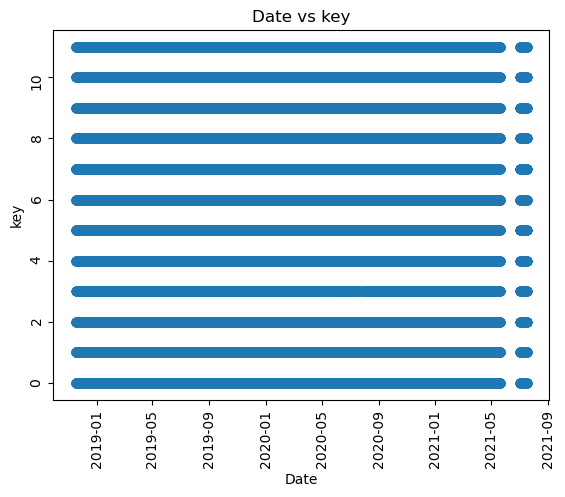

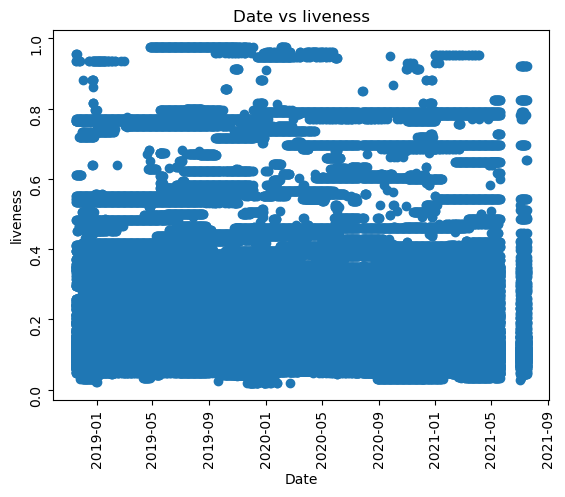

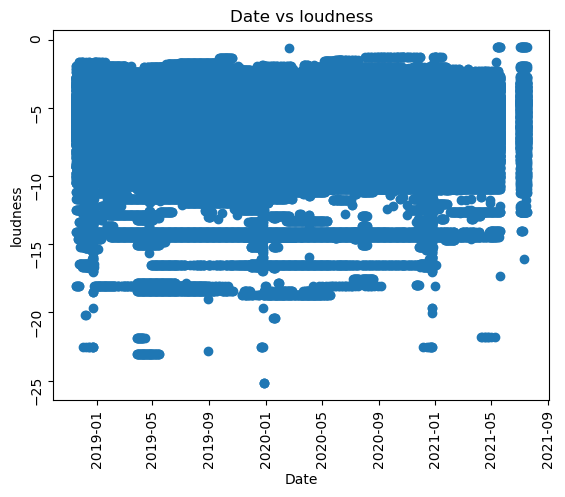

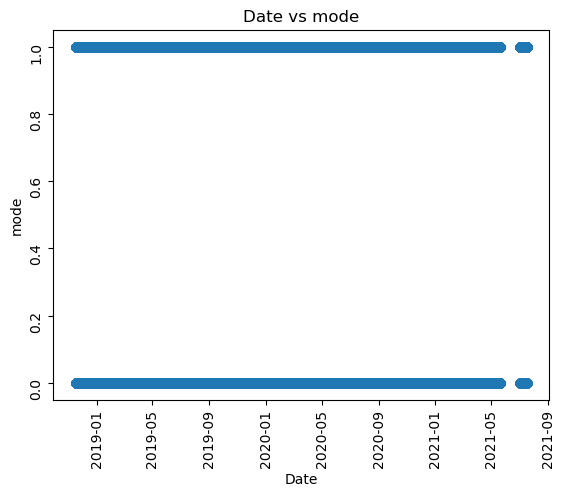

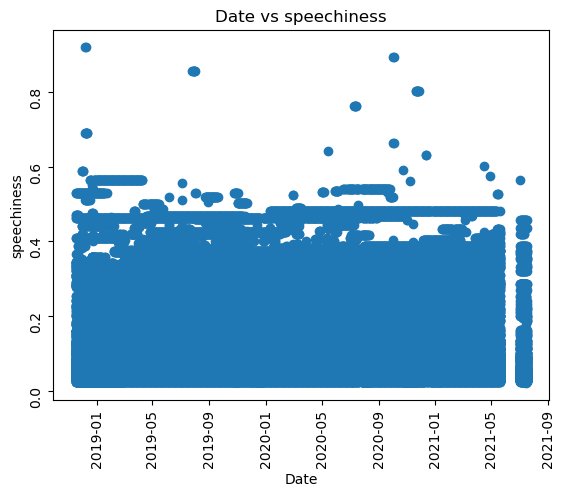

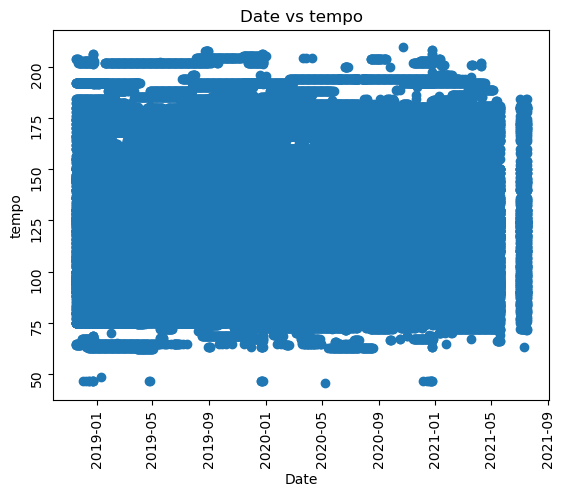

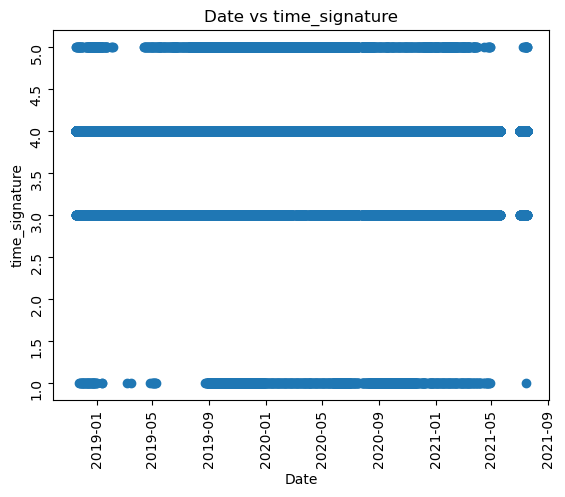

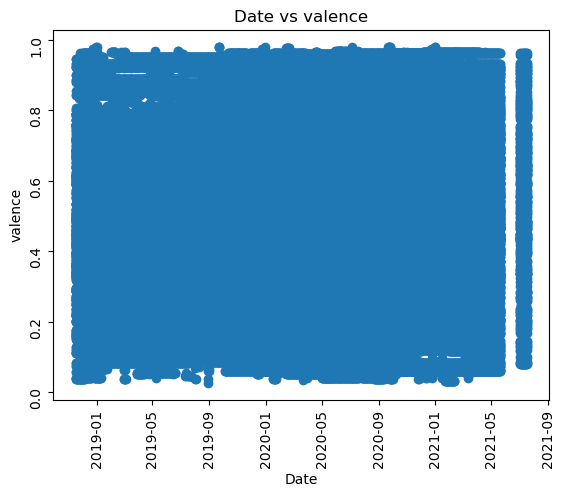

In [7]:
# Plotting all the audio features on a different scatter plot by using a for loop

x_col = "Date"

# Defining list of audio features
features = ["Popularity", "acousticness", "danceability", "duration_ms", 
            "energy", "instrumentalness", "key", "liveness", "loudness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

for y_col in features:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(filtered_music[x_col], filtered_music[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    ax.tick_params(labelrotation=90)

    plt.show()
    


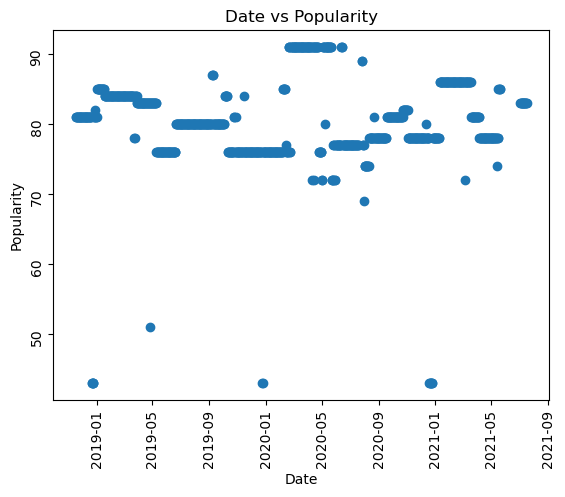

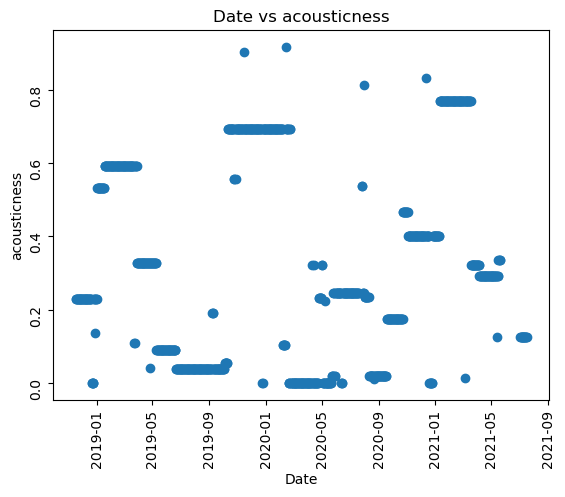

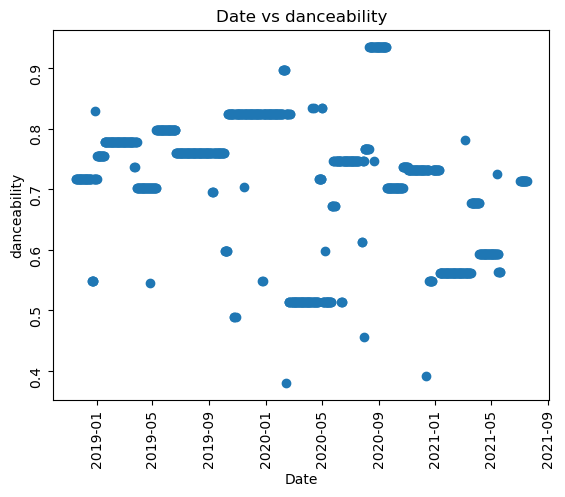

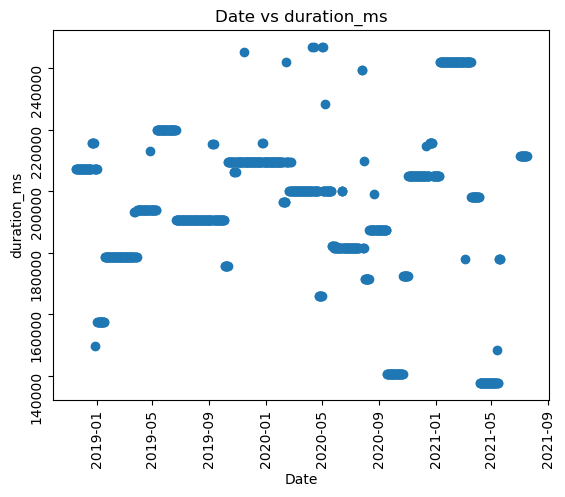

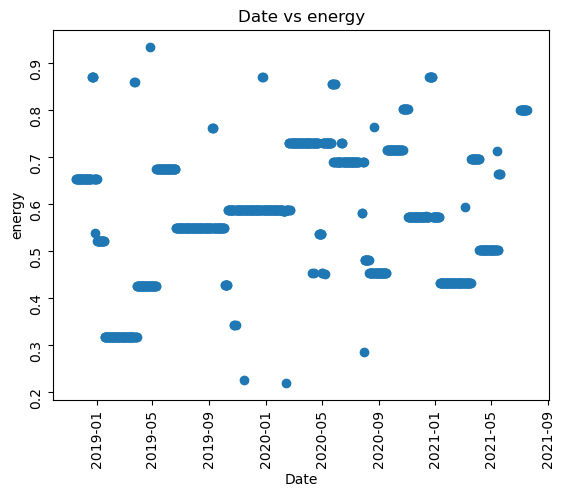

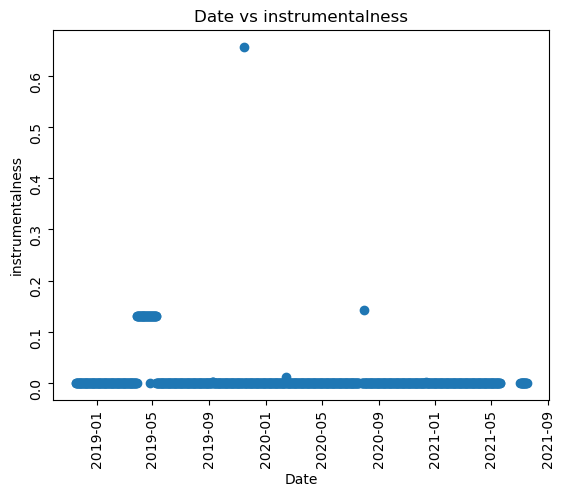

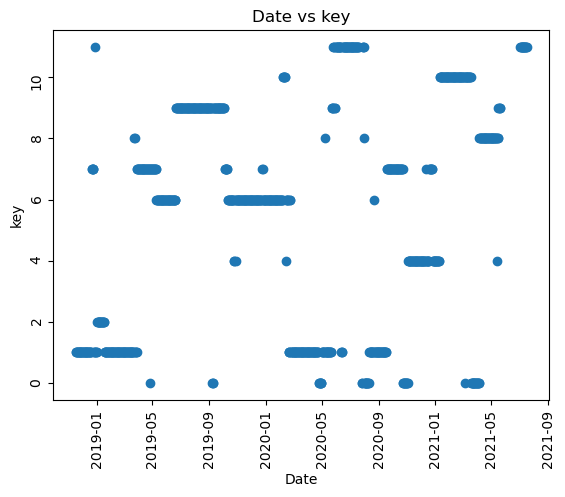

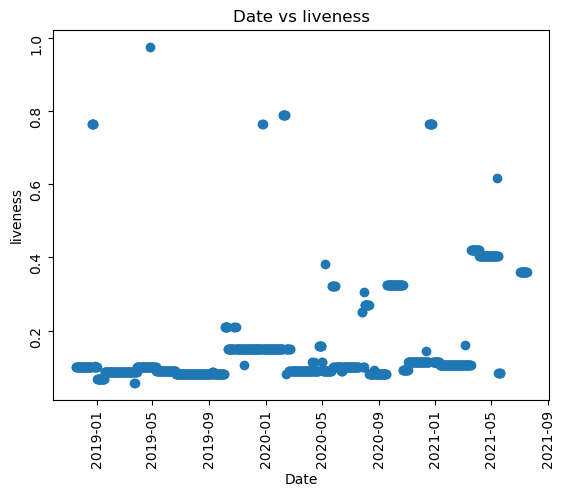

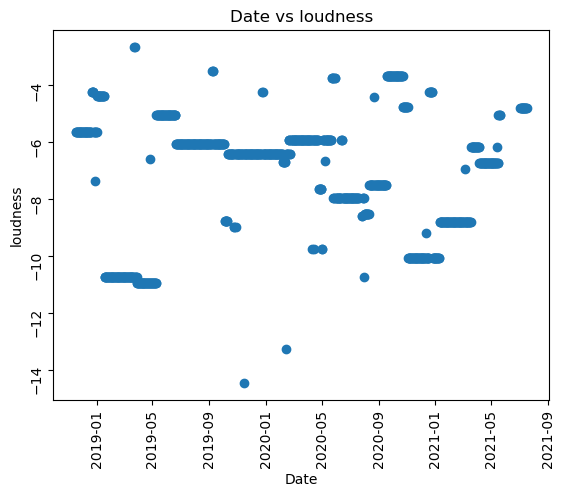

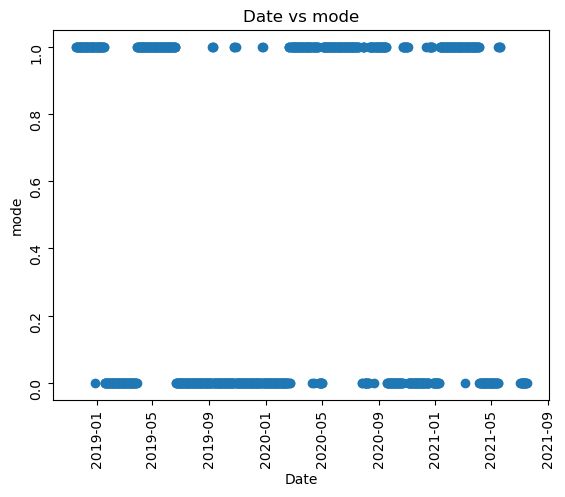

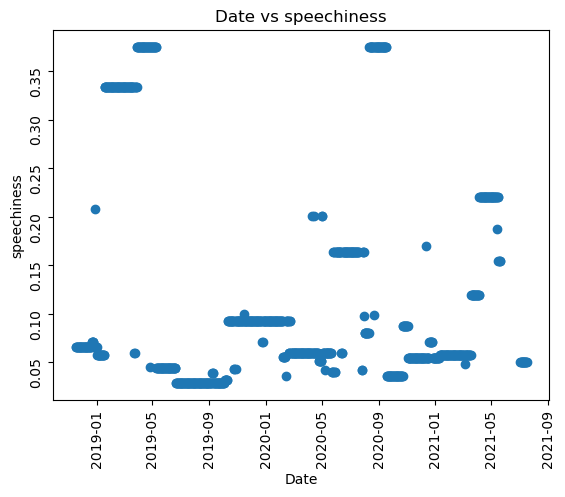

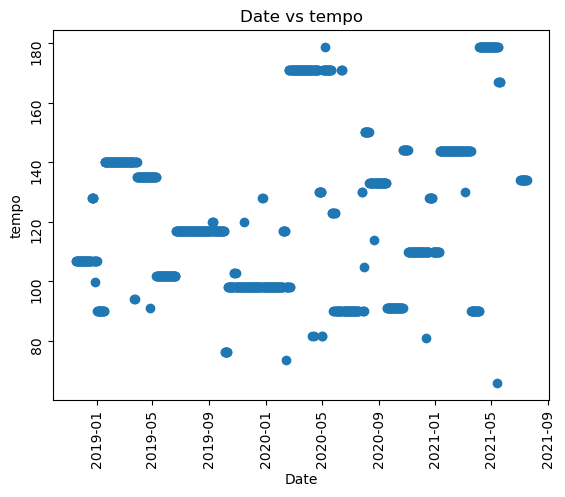

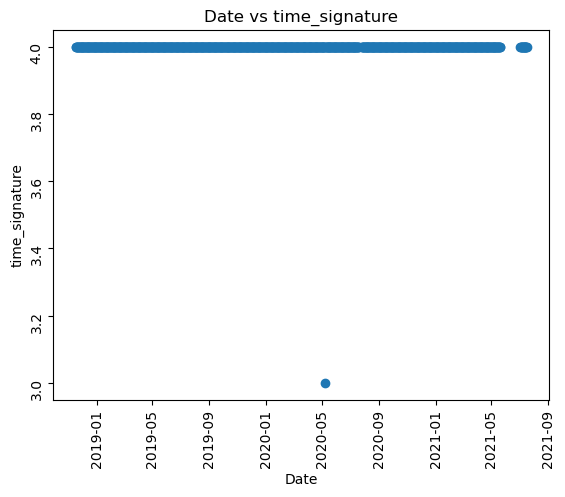

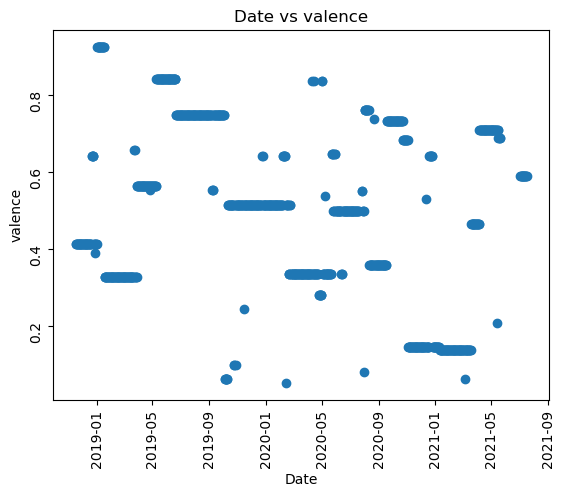

In [8]:
## Daily Top Song Scatter Plots

# Plotting all the audio features on a different scatter plot by using a for loop
x_col = "Date"

# Defining list of audio features
features = ["Popularity", "acousticness", "danceability", "duration_ms", 
            "energy", "instrumentalness", "key", "liveness", "loudness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

for y_col in features:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(dailytop_song[x_col], dailytop_song[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    ax.tick_params(labelrotation=90)

    plt.show()
    


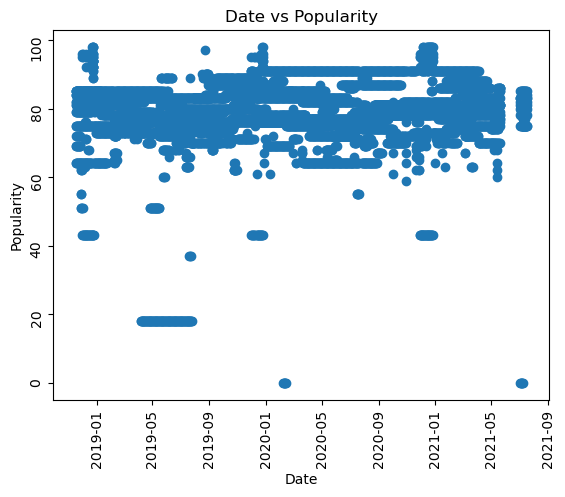

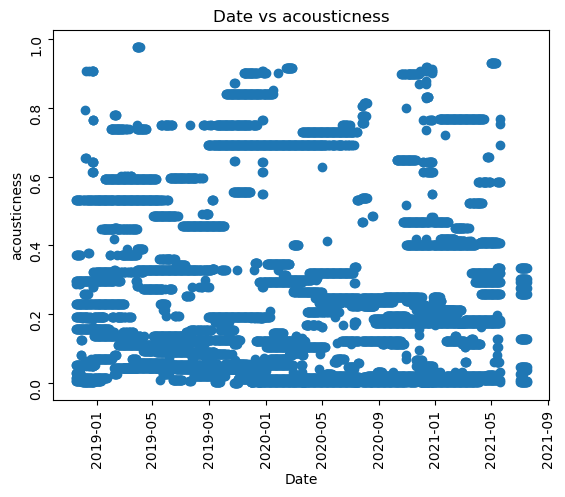

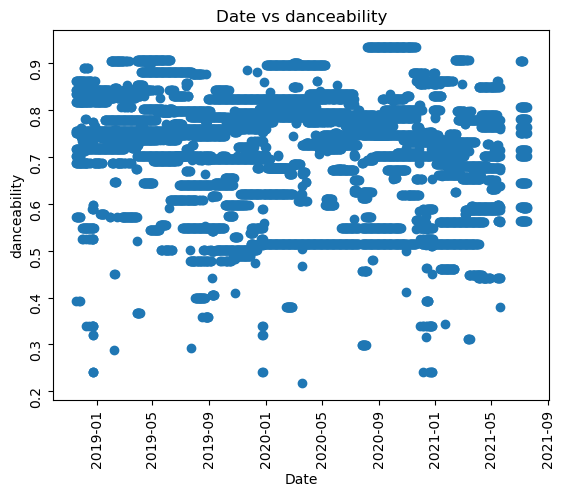

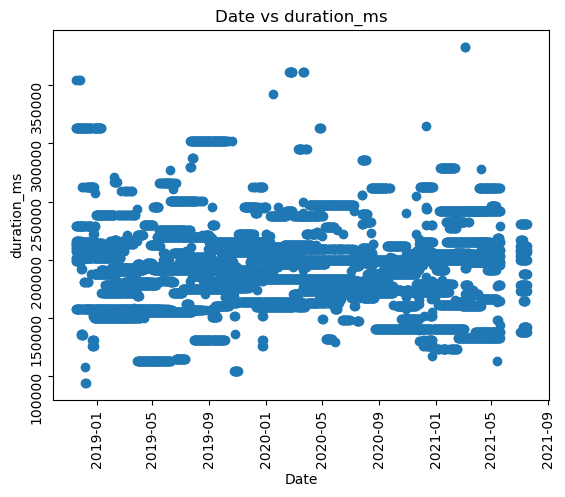

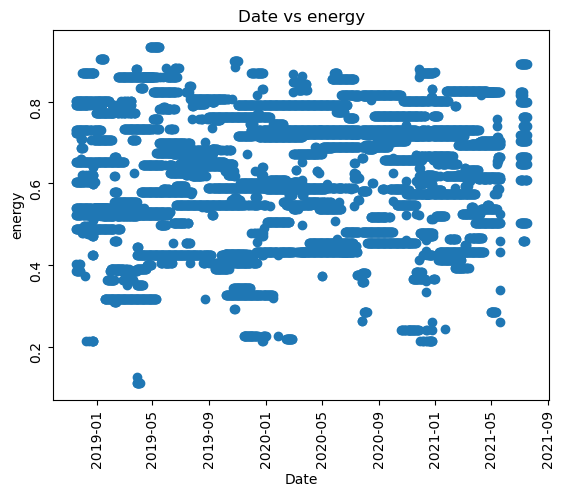

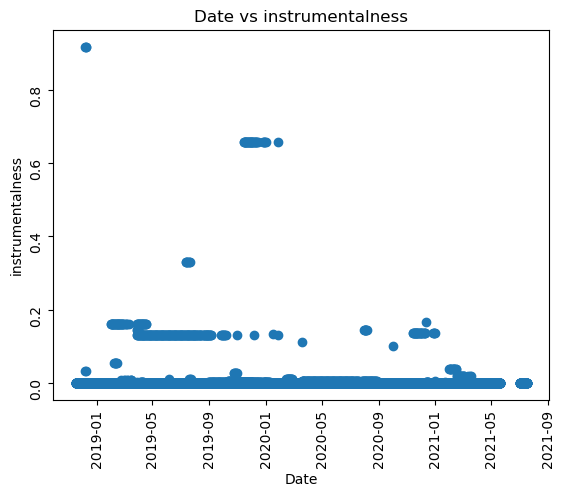

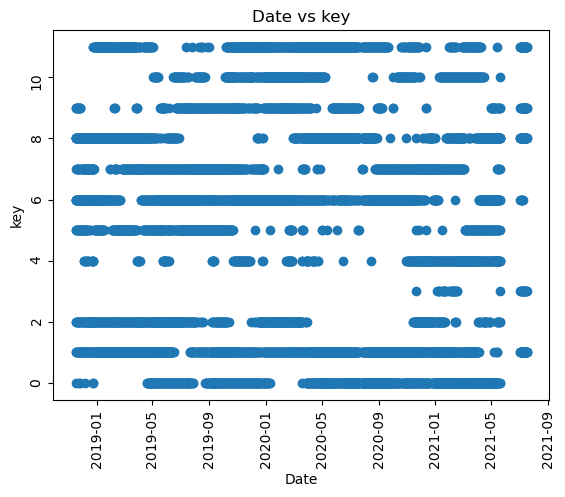

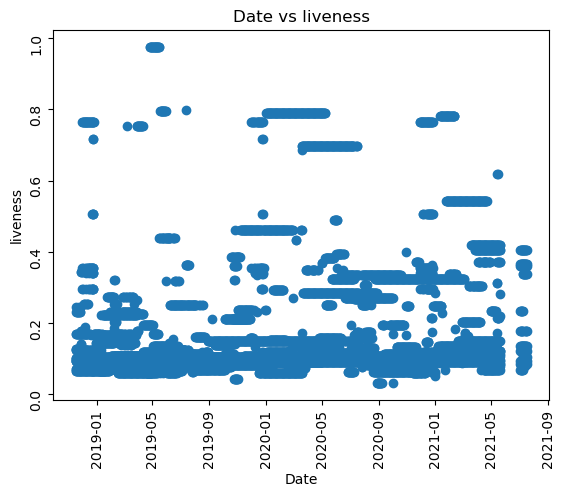

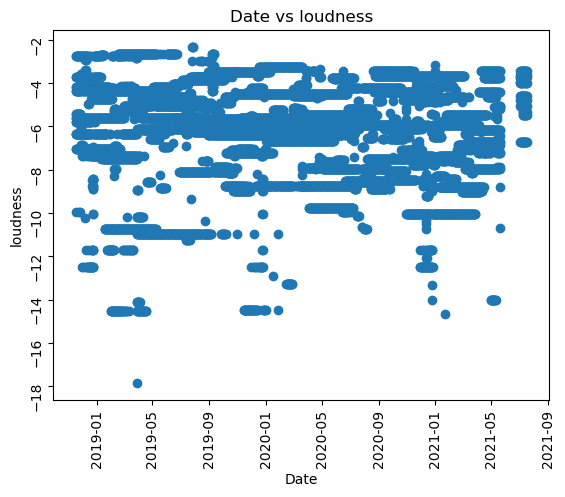

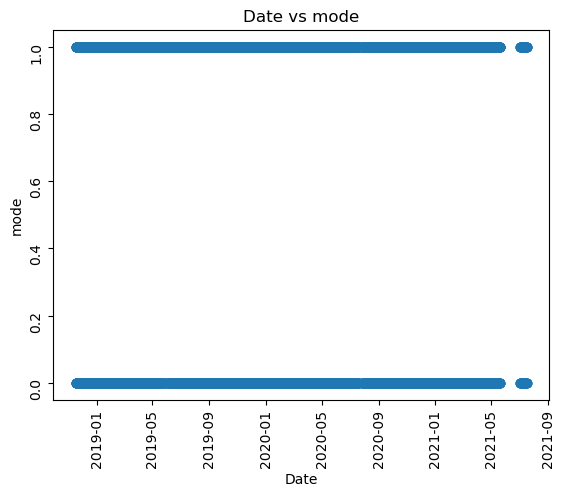

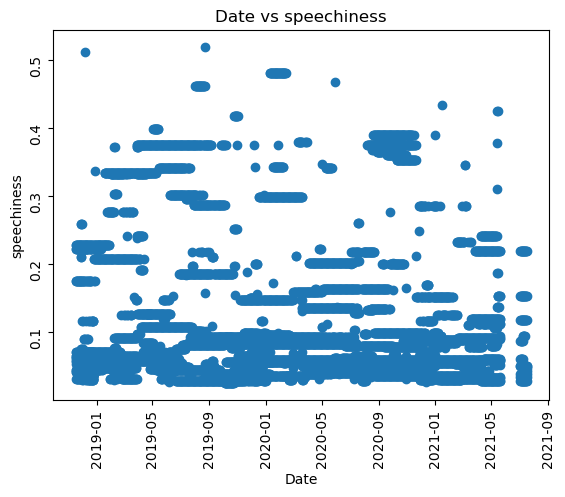

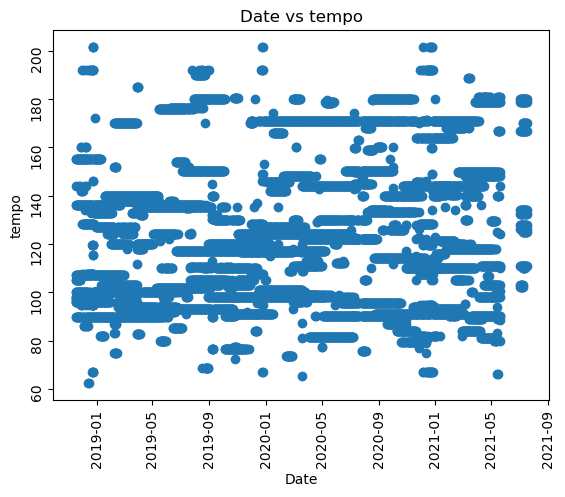

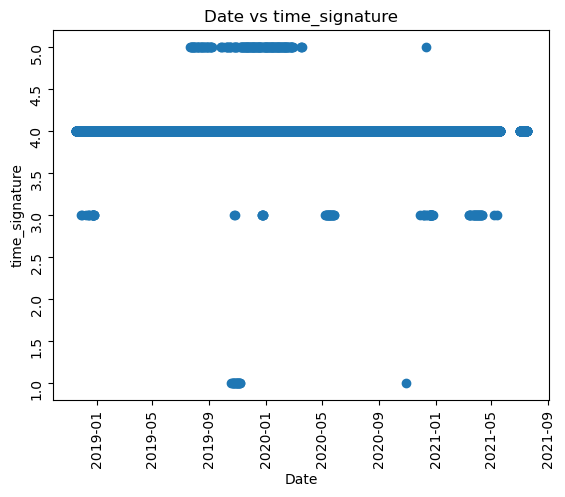

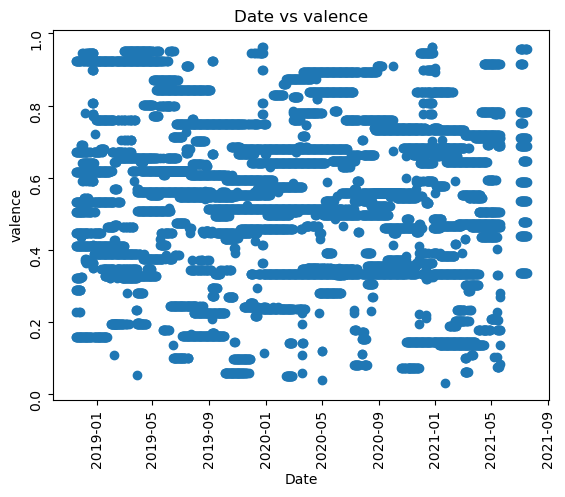

In [9]:
## Daily Top 10 Song Scatter Plots

# Plotting all the audio features on a different scatter plot by using a for loop
x_col = "Date"

# Defining list of audio features
features = ["Popularity", "acousticness", "danceability", "duration_ms", 
            "energy", "instrumentalness", "key", "liveness", "loudness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

for y_col in features:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(top10_songs[x_col], top10_songs[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    ax.tick_params(labelrotation=90)

    plt.show()

In [10]:
# loudness
loudness = filtered_music.loc[:, ["Position", "Track Name", "Artist", "Streams", 
                              "Date", "Year", "Month", "Master Genre", 
                              "Track ID", "Popularity", "loudness"]]

loudness.head()


,Position,Track Name,Artist,Streams,Date,Year,Month,Master Genre,Track ID,Popularity,loudness
136182,1,"thank u, next",Ariana Grande,6488660,2018-11-17,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,-5.634
136183,2,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,5110085,2018-11-17,2018,11,Pop,4w8niZpiMy6qz1mntFA5uM,75,-4.167
136184,3,MIA (feat. Drake),Bad Bunny,3783368,2018-11-17,2018,11,Latin,3Ueq2zboxwAbsvHrOjdEqz,64,-6.349
136185,4,Happier,Marshmello,3181025,2018-11-17,2018,11,Pop,7BqHUALzNBTanL6OvsqmC1,84,-2.749
136186,5,Without Me,Halsey,3100223,2018-11-17,2018,11,Pop,6FZDfxM3a3UCqtzo5pxSLZ,82,-7.050


Text(0.5, 0, 'Loudness')

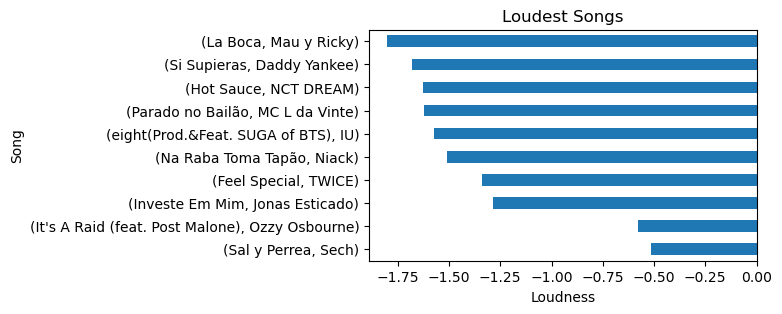

In [11]:
# Loudness is measured from -60 to 0

t_loudness = loudness.groupby(["Track Name","Artist"])["loudness"].mean().nlargest(10)
#print(t_loudness)

t_loudness.plot(kind = "barh", figsize=(5,3))
plt.title("Loudest Songs")
plt.ylabel("Song")
plt.xlabel("Loudness")

In [12]:
# tempo dataframe
tempo = filtered_music.loc[:, ["Position", "Track Name", "Artist", "Streams", 
                              "Date", "Year", "Month", "Master Genre", 
                              "Track ID", "Popularity", "tempo"]]


# fast tempo: >120 bpm, 
# medium tempo: 76–120 bpm
# slow tempo: 60–76 bpm

# Add column to tempo to determine "speed" of track
tempo["Speed"] = tempo["tempo"].map(lambda x:"fast" if x >120 else ("medium" if x >76 else "slow"))
tempo.head()

,Position,Track Name,Artist,Streams,Date,Year,Month,Master Genre,Track ID,Popularity,tempo,Speed
136182,1,"thank u, next",Ariana Grande,6488660,2018-11-17,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,106.966,medium
136183,2,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,5110085,2018-11-17,2018,11,Pop,4w8niZpiMy6qz1mntFA5uM,75,95.881,medium
136184,3,MIA (feat. Drake),Bad Bunny,3783368,2018-11-17,2018,11,Latin,3Ueq2zboxwAbsvHrOjdEqz,64,97.061,medium
136185,4,Happier,Marshmello,3181025,2018-11-17,2018,11,Pop,7BqHUALzNBTanL6OvsqmC1,84,100.011,medium
136186,5,Without Me,Halsey,3100223,2018-11-17,2018,11,Pop,6FZDfxM3a3UCqtzo5pxSLZ,82,136.041,fast


Streams (%) of Fast/Medium/Slow songs before Lockdown


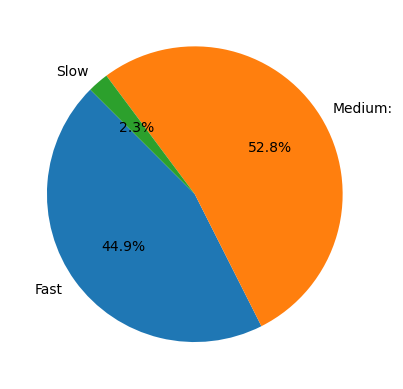

Streams (%) of Fast/Medium/Slow songs during/after Lockdown


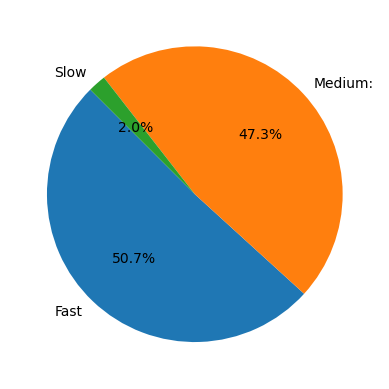

In [13]:
# Tempo Pre Covid dataframe (using a 486 day time frame to match the "post" covid data we have)
pre_tempo = tempo.loc[(tempo["Date"] > "2018-11-16")
                      & (tempo["Date"] < "2020-03-18")]

# Count streams for songs by speed 
pret_streams = pre_tempo.groupby(["Speed"])["Streams"].sum()

# Title for Pie Chart
print("Streams (%) of Fast/Medium/Slow songs before Lockdown")

# Plot Pie Chart
label = ["Fast", "Medium:", "Slow"]
plt.pie(pret_streams, labels = label, autopct="%.1f%%", radius = 1, startangle=135)
plt.show()


# Post Covid dataframe
post_tempo = tempo.loc[tempo["Date"] > "2020-03-17"]

# Count streams for songs by speed 
postt_streams = post_tempo.groupby(["Speed"])["Streams"].sum()

# Title for Pie Chart
print("Streams (%) of Fast/Medium/Slow songs during/after Lockdown")

# Plot Pie Chart
label = ["Fast", "Medium:", "Slow"]
plt.pie(postt_streams, labels = label, autopct="%.1f%%", radius = 1, startangle=135)
plt.show()

In [14]:
# danceability
danceability = filtered_music.loc[:, ["Position", "Track Name", "Artist", "Streams", 
                              "Date", "Year", "Month", "Master Genre", 
                              "Track ID", "Popularity", "danceability"]]


Text(0.5, 0, 'Danceability Factor')

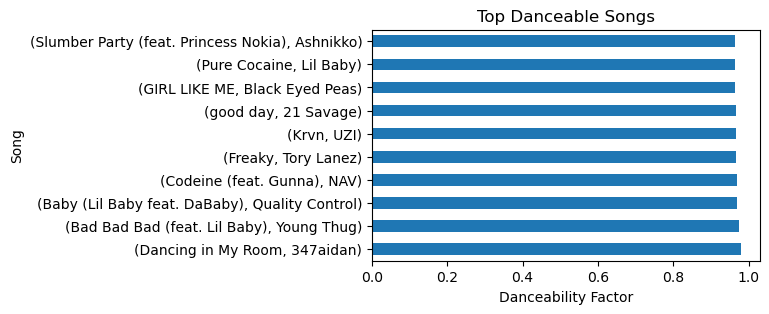

In [15]:
t_danceability = danceability.groupby(["Track Name","Artist"])["danceability"].mean().nlargest(10)
#print(t_danceability)

t_danceability.plot(kind = "barh", figsize=(5,3))
plt.title("Top Danceable Songs")
plt.ylabel("Song")
plt.xlabel("Danceability Factor")

In [16]:
daily_top_dance_song = pd.DataFrame(danceability.loc[danceability["Position"]==1,:])
daily_top_dance_song.head()

,Position,Track Name,Artist,Streams,Date,Year,Month,Master Genre,Track ID,Popularity,danceability
136182,1,"thank u, next",Ariana Grande,6488660,2018-11-17,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.717
136382,1,"thank u, next",Ariana Grande,5727318,2018-11-18,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.717
136582,1,"thank u, next",Ariana Grande,6276521,2018-11-19,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.717
136782,1,"thank u, next",Ariana Grande,6343338,2018-11-20,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.717
136982,1,"thank u, next",Ariana Grande,6322594,2018-11-21,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.717


Text(0.5, 0, 'Danceability Factor')

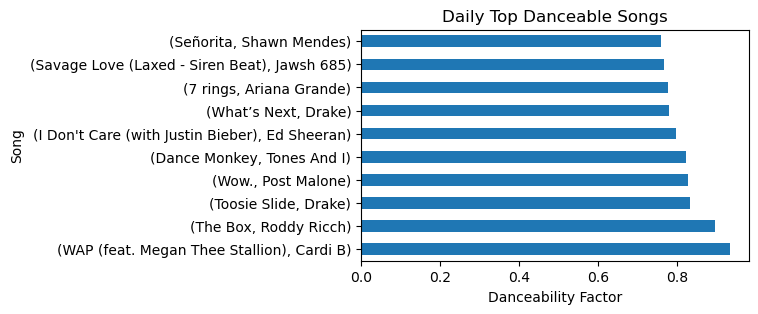

In [17]:
dt_danceability = daily_top_dance_song.groupby(["Track Name","Artist"])["danceability"].mean().nlargest(10)
#print(dt_danceability)

dt_danceability.plot(kind = "barh", figsize=(5,3))
plt.title("Daily Top Danceable Songs")
plt.ylabel("Song")
plt.xlabel("Danceability Factor")


In [18]:
# speechiness
speechiness = filtered_music.loc[:, ["Position", "Track Name", "Artist", "Streams", 
                              "Date", "Year", "Month", "Master Genre", 
                              "Track ID", "Popularity", "speechiness"]]


Text(0.5, 0, 'Speechiness Factor')

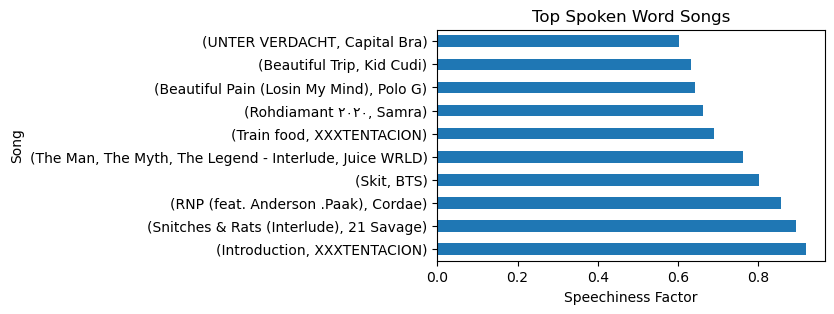

In [19]:
t_speechiness = speechiness.groupby(["Track Name","Artist"])["speechiness"].mean().nlargest(10)
#print(t_speechiness)

t_speechiness.plot(kind = "barh", figsize=(5,3))
plt.title("Top Spoken Word Songs")
plt.ylabel("Song")
plt.xlabel("Speechiness Factor")

In [20]:
# energy
energy = filtered_music.loc[:, ["Position", "Track Name", "Artist", "Streams", 
                              "Date", "Year", "Month", "Master Genre", 
                              "Track ID", "Popularity", "energy"]]


Text(0.5, 0, 'Energy Factor')

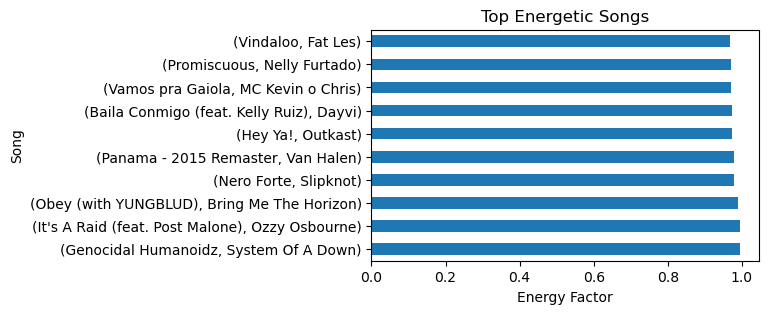

In [21]:
t_energy = energy.groupby(["Track Name","Artist"])["energy"].mean().nlargest(10)
#print(t_energy)

t_energy.plot(kind = "barh", figsize=(5,3))
plt.title("Top Energetic Songs")
plt.ylabel("Song")
plt.xlabel("Energy Factor")

In [22]:
# valence
valence = filtered_music.loc[:, ["Position", "Track Name", "Artist", "Streams", 
                              "Date", "Year", "Month", "Master Genre", 
                              "Track ID", "Popularity", "valence"]]

valence.head()


,Position,Track Name,Artist,Streams,Date,Year,Month,Master Genre,Track ID,Popularity,valence
136182,1,"thank u, next",Ariana Grande,6488660,2018-11-17,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.412
136183,2,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,5110085,2018-11-17,2018,11,Pop,4w8niZpiMy6qz1mntFA5uM,75,0.617
136184,3,MIA (feat. Drake),Bad Bunny,3783368,2018-11-17,2018,11,Latin,3Ueq2zboxwAbsvHrOjdEqz,64,0.158
136185,4,Happier,Marshmello,3181025,2018-11-17,2018,11,Pop,7BqHUALzNBTanL6OvsqmC1,84,0.671
136186,5,Without Me,Halsey,3100223,2018-11-17,2018,11,Pop,6FZDfxM3a3UCqtzo5pxSLZ,82,0.533


In [23]:
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), 
# while tracks with low valence sound more negative (e.g. sad, depressed, angry).

valence["Sentiment"] = valence["valence"].map(lambda x:"Sad" if x<0.4 else "Happy")
valence.head()

,Position,Track Name,Artist,Streams,Date,Year,Month,Master Genre,Track ID,Popularity,valence,Sentiment
136182,1,"thank u, next",Ariana Grande,6488660,2018-11-17,2018,11,Pop,3e9HZxeyfWwjeyPAMmWSSQ,81,0.412,Happy
136183,2,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,5110085,2018-11-17,2018,11,Pop,4w8niZpiMy6qz1mntFA5uM,75,0.617,Happy
136184,3,MIA (feat. Drake),Bad Bunny,3783368,2018-11-17,2018,11,Latin,3Ueq2zboxwAbsvHrOjdEqz,64,0.158,Sad
136185,4,Happier,Marshmello,3181025,2018-11-17,2018,11,Pop,7BqHUALzNBTanL6OvsqmC1,84,0.671,Happy
136186,5,Without Me,Halsey,3100223,2018-11-17,2018,11,Pop,6FZDfxM3a3UCqtzo5pxSLZ,82,0.533,Happy


Streams (%) of Sad/Happy songs before Lockdown


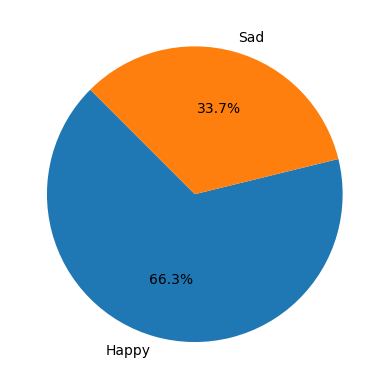

Streams (%) of Sad/Happy songs during/after Lockdown


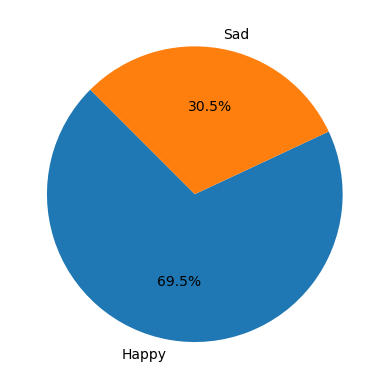

In [24]:
# Pre Covid dataframe (using a 486 day time frame to match the "post" covid data we have)
pre_valence = valence.loc[(valence["Date"] > "2018-11-16")
                          & (valence["Date"] < "2020-03-18")]

# Count streams for songs by sentiment 
prev_streams = pre_valence.groupby(["Sentiment"])["Streams"].sum()

# Title for Pie Chart
print("Streams (%) of Sad/Happy songs before Lockdown")

# Plot Pie Chart
label = ["Happy", "Sad"]
explode = (0.0, 0.0) 
plt.pie(prev_streams, labels = label, explode = explode, autopct="%.1f%%", radius = 1, startangle=135)
plt.show()


# Post Covid dataframe
post_valence = valence.loc[valence["Date"] > "2020-03-17"]

# Count streams for songs by sentiment 
post_streams = post_valence.groupby(["Sentiment"])["Streams"].sum()

# Title for Pie Chart
print("Streams (%) of Sad/Happy songs during/after Lockdown")

# Plot Pie Chart
label = ["Happy", "Sad"]
explode = (0.0, 0.0) 
plt.pie(post_streams, labels = label, explode = explode, autopct="%.1f%%", radius = 1, startangle=135)
plt.show()

In [25]:
audio_features = filtered_music.loc[:, ["Year", "Month", "Date",
                                      "Popularity", "acousticness", "danceability", 
                                      "energy", "instrumentalness", "liveness", 
                                      "loudness", "speechiness", "tempo", "valence"]]

# Changing date field to YYYYMM format
audio_features["Date"] = audio_features["Date"].dt.strftime("%Y%m")

# Converting date to number so that average can be taken
audio_features["Date"] = pd.to_numeric(audio_features["Date"])

#audio_features.head()

# Average monthly values of audio features
average_af = audio_features.groupby(["Year","Month"]).mean()

# Converting back to date
average_af["Date"] = pd.to_datetime(average_af["Date"], format="%Y%m").dt.strftime("%Y%m")
average_af

Date  Popularity  acousticness  danceability    energy  \
Year Month                                                             
2018 11     201811   73.465714      0.243386      0.692078  0.629440   
     12     201812   75.292258      0.287283      0.677275  0.612851   
2019 1      201901   73.776613      0.244607      0.709032  0.631286   
     2      201902   73.347321      0.248252      0.704693  0.626616   
     3      201903   72.837581      0.262780      0.706219  0.616629   
     4      201904   72.220833      0.268508      0.705355  0.605139   
     5      201905   72.438871      0.256750      0.700333  0.616641   
     6      201906   72.351333      0.253424      0.705530  0.628502   
     7      201907   71.892258      0.245187      0.706227  0.636020   
     8      201908   72.951613      0.252045      0.708512  0.631752   
     9      201909   73.004000      0.247874      0.707738  0.632749   
     10     201910   72.833871      0.250376      0.701521  0.630893   
     11     201911   72.912333      0.250706      0.693016  0.621436   
     12     201912   75.903065      0.301899      0.672574  0.597033   
2020 1      202001   73.461452      0.259467      0.711198  0.602870   
     2      202002   72.824310      0.268320      0.705146  0.604114   
     3      202003   73.395000      0.257943      0.707804  0.611454   
     4      202004   74.672833      0.262336      0.703078  0.613057   
     5      202005   74.212419      0.254825      0.710589  0.618012   
     6      202006   74.537333      0.255757      0.713392  0.622386   
     7      202007   73.904200      0.256848      0.710016  0.618430   
     8      202008   74.531613      0.271366      0.698694  0.612194   
     9      202009   74.482333      0.250419      0.702492  0.620103   
     10     202010   74.644032      0.245728      0.700082  0.627429   
     11     202011   75.333167      0.256267      0.693566  0.621465   
     12     202012   76.560806      0.314484      0.668996  0.602275   
2021 1      202101   75.865968      0.267040      0.693827  0.618338   
     2      202102   76.094464      0.257007      0.694156  0.622306   
     3      202103   75.912903      0.256976      0.686830  0.620764   
     4      202104   76.480667      0.252410      0.681586  0.628599   
     5      202105   75.883750      0.253334      0.690598  0.634929   
     7      202107   75.043000      0.261468      0.676799  0.638318   

            instrumentalness  liveness  loudness  speechiness       tempo  \
Year Month                                                                  
2018 11             0.007801  0.178365 -6.176104     0.113826  121.060540   
     12             0.011183  0.186237 -6.582871     0.107353  120.981706   
2019 1              0.010583  0.172453 -6.050930     0.113008  120.766029   
     2              0.009429  0.169361 -6.136170     0.113422  119.426698   
     3              0.009944  0.170040 -6.209171     0.117115  117.403865   
     4              0.017299  0.173374 -6.549751     0.122639  117.532506   
     5              0.011931  0.180445 -6.380093     0.122616  119.189085   
     6              0.008047  0.177519 -6.209723     0.121736  119.970175   
     7              0.009138  0.179916 -6.093465     0.127051  119.088891   
     8              0.012596  0.177149 -6.127328     0.128739  119.915263   
     9              0.013151  0.168823 -5.915911     0.131027  120.658354   
     10             0.012958  0.166584 -5.868325     0.132258  121.327579   
     11             0.013102  0.170031 -6.060040     0.126222  120.171810   
     12             0.011954  0.169772 -6.681386     0.104868  119.830232   
2020 1              0.010739  0.165705 -6.241500     0.121060  118.225939   
     2              0.011368  0.166843 -6.222652     0.116125  119.144321   
     3              0.006112  0.163080 -6.170226     0.117260  119.253396   
     4              0.009794  0.164700 -6.152260     0.112081  119.214371   
     5              0.012

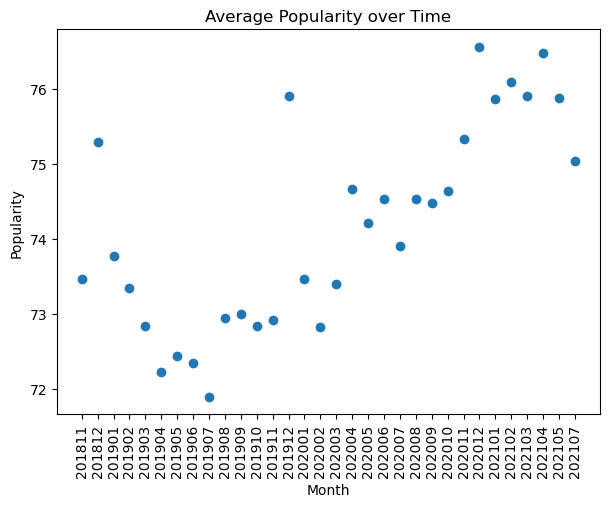

In [26]:
# Build scatter plot for Popularity
plt.figure(figsize=(7,5))
plt.scatter(average_af["Date"], average_af["Popularity"], linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("Average Popularity over Time")
plt.xlabel("Month")
plt.ylabel("Popularity")
plt.xticks(rotation=90)

# Show plot
plt.show()

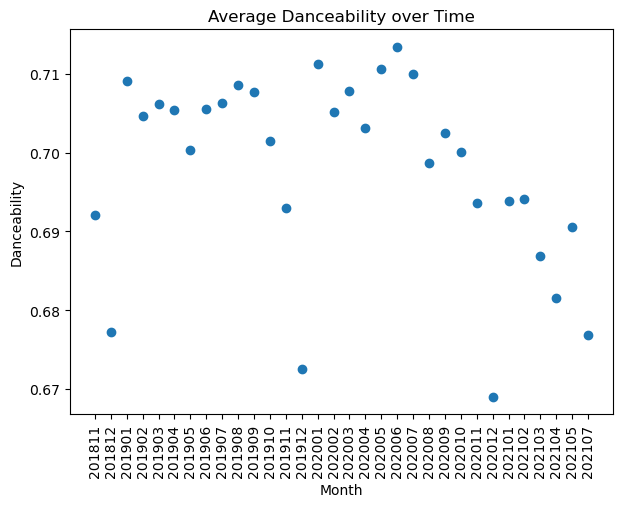

In [28]:
# Build scatter plot for danceability
plt.figure(figsize=(7,5))
plt.scatter(average_af["Date"], average_af["danceability"], linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("Average Danceability over Time")
plt.xlabel("Month")
plt.ylabel("Danceability")
plt.xticks(rotation=90)

# Show plot
plt.show()

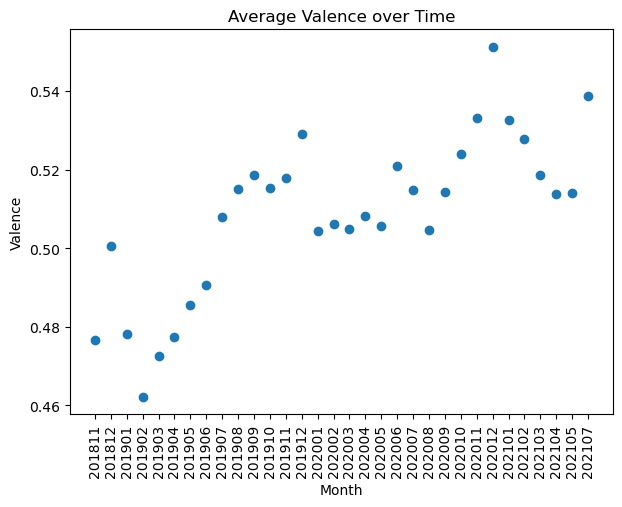

In [29]:
# Build scatter plot for valence
plt.figure(figsize=(7,5))
plt.scatter(average_af["Date"], average_af["valence"], linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("Average Valence over Time")
plt.xlabel("Month")
plt.ylabel("Valence")
plt.xticks(rotation=90)

# Show plot
plt.show()